# **Troisième partie** :
Renconnaissance de chiffres manuscrits avec un second jeu de données.

In [1]:
import sklearn
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/semeion/semeion.data", delimiter = r"\s+",
                header=None )

In [3]:
df.head()

0    1    2    3    4    5    6    7    8    9    ...  256  257  258  259  \
0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  ...    1    0    0    0   
1  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  ...    1    0    0    0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...    1    0    0    0   
3  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  ...    1    0    0    0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...    1    0    0    0   

   260  261  262  263  264  265  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 266 columns]

In [4]:
df.shape

(1593, 266)

In [5]:
X = pd.DataFrame(df)
X = X.drop([256,257,258,259,260,261,262,263,264,265], axis=1)
type(X)

pandas.core.frame.DataFrame

In [6]:
X.shape
label_df = pd.DataFrame(df.iloc[:,[256,257,258,259,260,261,262,263,264,265]])
label_df.head()
label_df.rename(columns={256:0, 257:1, 258:2, 259:3, 260:4, 261:5, 262:6, 263:7, 264:8, 265:9 }, inplace=True)
label_df.head()
label_df['y'] = label_df.apply(lambda x: label_df.columns[x.argmax()], axis = 1)
label_df.head()
label_df.tail()
y = label_df['y']
type(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=5)
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(80,)

In [7]:
clf_knn = KNeighborsClassifier()
k_range = range (1,6)
knn_weight_options = ['uniform','distance']
knn_algorithm_options = ['ball_tree', 'kd_tree', 'brute']
knn_params = {'n_neighbors':k_range, 'weights':knn_weight_options, 'algorithm': knn_algorithm_options}
knn_grid = GridSearchCV(clf_knn, knn_params, cv=10, scoring='accuracy')
knn_grid.fit(X,y)
knn_grid.best_params_
knn_grid.best_score_
knn_grid.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=4, weights='distance')

In [8]:
clf_final = KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')
clf_final.fit(X_train,y_train)
KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')
y_pred = clf_final.predict(X_test)
print (metrics.accuracy_score(y_test,y_pred))

0.9125


In [9]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[8, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 8, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 7, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 9, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 8, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 7, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 6, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 9, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 4, 1],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 7]])

Text(95.72222222222221, 0.5, 'Actual')

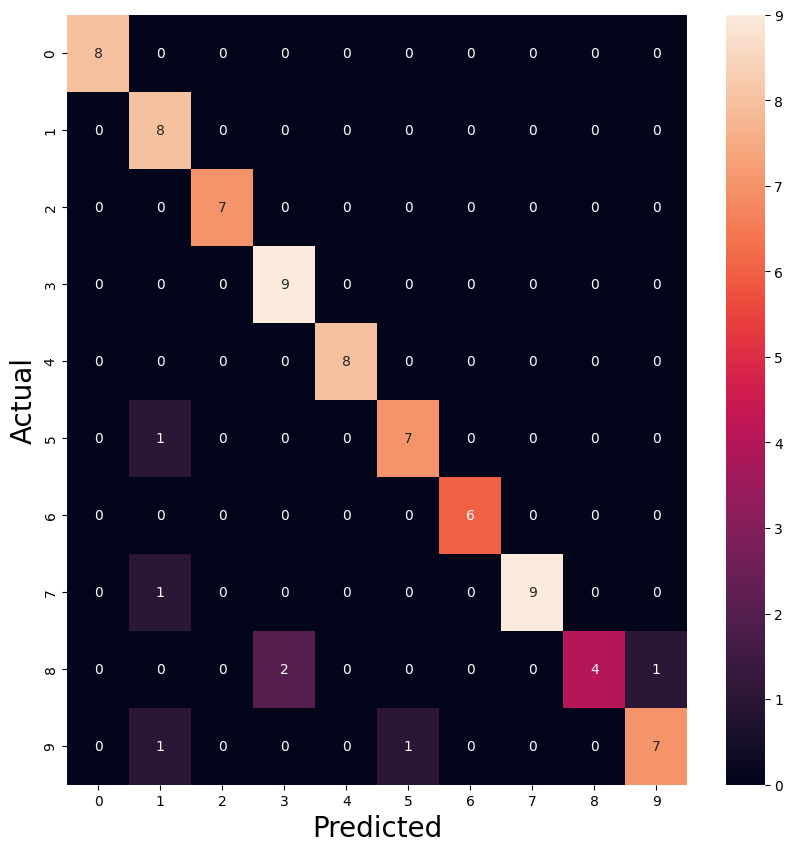

In [10]:
labels = [0,1,2,3,4,5,6,7,8,9]
df_cm = pd.DataFrame(cm, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)

In [11]:
y_test_df = y_test.to_frame()
y_test_df['y_pred'] = pd.Series(y_pred, index=y_test_df.index)
y_test_df.index[y_test_df.y != y_test_df.y_pred]

Index([1519, 149, 1153, 1158, 1034, 1562, 568], dtype='int64')

In [12]:
wrong_list = [1519, 149, 1153, 1158, 1562, 568]
y_test_df.loc[wrong_list]

y  y_pred
1519  8       3
149   7       1
1153  8       9
1158  9       5
1562  9       1
568   8       3

In [13]:
def make_image (index_num):
    one_row = X.loc[index_num]
    one_values = one_row.values

    i = 16
    j = 0
    img = np.array(one_values[:16])
    while i <= len(one_values):
        temp_array = np.array(one_values[j:i])
        img = np.vstack((img,temp_array))
        j = i
        i += 16

    plt.imshow(img,cmap=plt.cm.gray_r,interpolation="nearest")
    plt.show()
    print ("*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*")
    print (y_test_df.loc[index_num])
    return

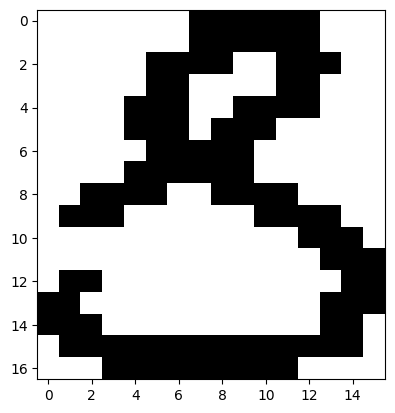

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
y         8
y_pred    3
Name: 1519, dtype: int64


In [14]:
make_image(1519)

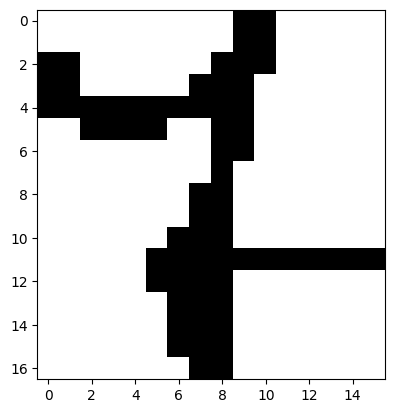

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
y         7
y_pred    1
Name: 149, dtype: int64


In [15]:
make_image(149)

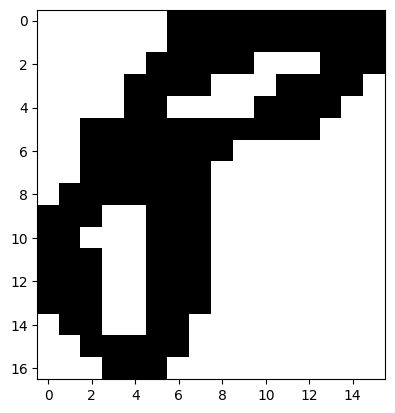

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
y         8
y_pred    9
Name: 1153, dtype: int64


In [16]:
make_image(1153)

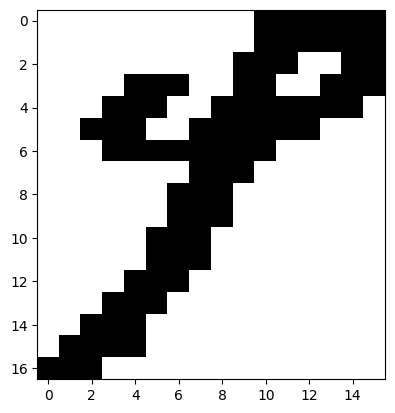

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
y         9
y_pred    1
Name: 1562, dtype: int64


In [17]:
make_image(1562)

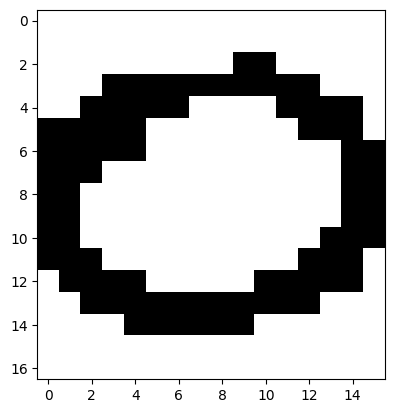

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
y         0
y_pred    0
Name: 599, dtype: int64


In [18]:
make_image(599)